# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [75]:
#Import Libraries for mathematical operation
import numpy as np

#Import Libraries for dataframe
import pandas as pd

#Import Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Import Libraries for warnings. Filter warnings
from logging import warning
import warnings
warnings.filterwarnings("ignore")

# command to tell python to display graphs
%matplotlib inline

### Understanding the structure of the data

In [76]:
# Command to connect to google drive and read dataset .The .csv file data is read using pandas library into a dataframe named df.
from google.colab import drive
drive.mount('/content/drive')

#read the data
df= pd.read_csv("/content/drive/MyDrive/MyLearning/foodhub_order.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
#Read the data and check the if the dataset is loaded correctly
# head() function returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


***Observations***

Dataset has been loaded into the dataframe.


*  There are 9 columns of data available in the loaded dataframe.
*  Data contains orders(orderid) placed by customers(customerid) for various
restaurants/cuisine types during any day of the week(weekends or weekday).
* Data contains cost of the orders and the time taken for food prep and delivery.
* Customers have provided ratings for the restaurants.However from the initial
analysis, there are rows for which rating has not been provided by customers for few restaurant orders(indicated as *'Not Given'*).

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [78]:
#Get total number of records(rows and columns) in the dataframe by checking the shape
df.shape

(1898, 9)

**Observations**

The Dataset has 1898 number of rows with 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [79]:
#Get the dataset info for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations**



*   There are around 5 numerical data type columns and 4 object type columns.
*   All the columns have 1898 records which means there are no NULL values.
*   Rating column is of data type object which means we will need to check on
    the values to see if there are any non-numerical values


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [80]:
#check if there are any null values across each column using isnull() on every row and sum the total null records

df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [81]:
#Check if there are any duplicates
df.duplicated().sum()

0

**Observation**

*   There are no null values or missing values in any column.
*   There are no duplicate records in the dataset.




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [82]:
#Statisticaly summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


**Observations**

**Answer**: *   Average time for food preparation is close 27 min . The minimum time taken for food preparation is 20 min and maximum time taken is 35min. About 75% of orders have the food prepartion time in 31 min

*   Most of the orders are placed for restaurant Shake Shack
*   Most of the orders are placed for cuisine type American
*   Most of the orders are placed during weekends
*   Most of the orders have their rating marked as 'Not given'
*   Average cost of order is 16.There are orders with minimum of 4.47 and maximum of 35.41 . About 75 percentage of orders have cost close to 22.29

*   Average time for delivery is close 24 min . The minimum time taken for food delivery is 15 min and maximum time taken is 33min. About 75% of orders have the delivery time in 28 min.
*   Looking at the food prepartion time and delivery time together , both times **does not** seem to have a large variation with respect to each other.


### **Question 5:** How many orders are not rated? [1 mark]

In [83]:
#check the records having rating as 'Not given' i.e not rated records
df.loc[df['rating']=='Not given'].value_counts()

order_id  customer_id  restaurant_name        cuisine_type   cost_of_the_order  day_of_the_week  rating     food_preparation_time  delivery_time
1476551   49034        The Smile              American       12.18              Weekend          Not given  22                     27               1
1477772   91958        TAO                    Japanese       12.18              Weekday          Not given  26                     33               1
1477753   65306        Sushi of Gari Tribeca  Japanese       14.79              Weekend          Not given  32                     24               1
1477756   251607       Shake Shack            American       14.12              Weekday          Not given  31                     28               1
1477757   60688        Shake Shack            American       14.12              Weekend          Not given  29                     30               1
                                                                                                         

**Observation**

**Answer : 736 records have not been rated**

In [84]:
# Rating column was of object type when df.info command was run. Rating of type 3,4,5 and 'Not Given' was seen in the data.
#Checking the Rating colum data specifically

# Checking the percentage of rating values
df.rating.value_counts(normalize=True, dropna=False)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

In [85]:
#Check the count of the  data types  in rating column
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

**Observation**


*   There are ratings with values 3,4, 5 and 'Not given'.
*   There are about 38% of data having rating as 'Not given'.
*   The datatype of all values in the column rating is string or object type.

*   38% of the values in rating column has **NOT** been rated (i.e Not given).
This is a fairly large percentage , therefore treating this column with mean or median or mode could give us a highly skewed result. It is good to keep this column as it is for now.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

**Observation**

*  Numerical columns include- order_id, customer_id,cost_of_the_order,food_preparation_time and delivery_time.
*   Categorical columns include-restaurant_name,cuisine_type,day_of_the_week and rating

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Analysis on Customer Id**

In [86]:
#Get the unique number of customer ids
df['customer_id'].nunique()

1200

In [87]:
#Get the total order placed by each customer
df.groupby(['customer_id'])['order_id'].count().sort_values(ascending=False)

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
          ..
105903     1
105992     1
106006     1
106324     1
405334     1
Name: order_id, Length: 1200, dtype: int64

**Observation**



*   There are about 1200 customers in the system
*   There are only a few customers who frequently place order. Most of the customers have only placed orders one time.



**Univariate analysis - cost of order**

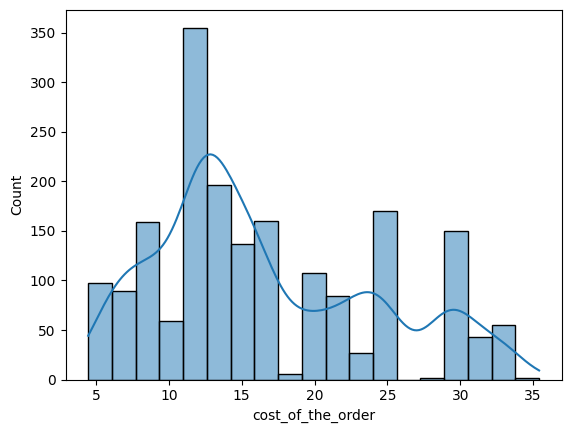

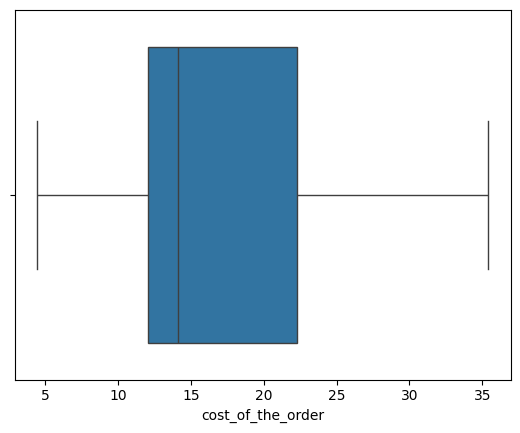

In [88]:
# histograms for numerical columns vs count using seaborn. kde is the density curve which shows the distribution
sns.histplot(data=df,x='cost_of_the_order',kde=True)
plt.show()
#boxplots for numerical columns to show mean, median ,quartile and outliers
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

In [22]:
#Find percentage of orders costing more than 20 dollars.

percentage_order= ((df['cost_of_the_order']>20.0).sum()[(df['cost_of_the_order']>20.0).sum()>0]/df.shape[0])*100
print(percentage_order)

[29.24130664]


**Observation**


*   Distribution of cost_of_the_order is  right skewed. Boxplot shows longer right whisker.
*   Avg cost of order is 16 dollars.
*   About 29% of the total orders have cost above 20 dollars.That means, most of the orders are priced less.About 75% of orders have cost between 11 ~23.
*   There are no outliers for the cost_of_the order, and the mean & median are not the same but almost close to each other.



**Univariate analysis - food prep time**

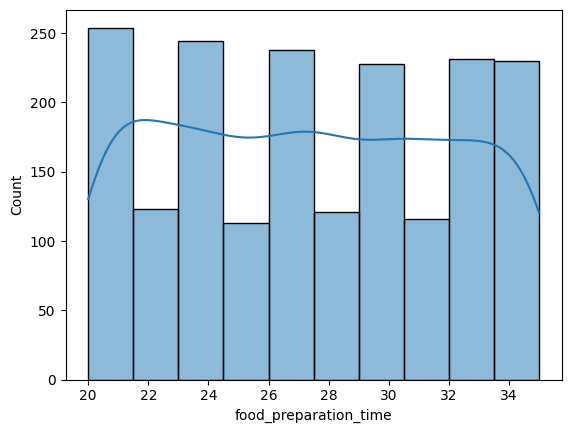

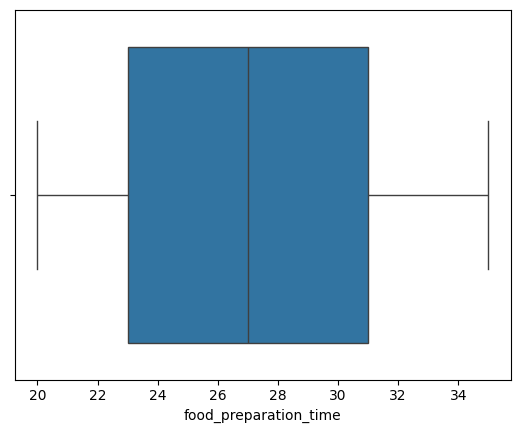

In [23]:
#Histogram to show the food_prepation_time Vs count of orders
sns.histplot(data=df,x='food_preparation_time',bins=10,kde=True)
plt.show()
#Boxplot to show the mean, median, quartile and outliers for food_prepation_time
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

**Observation**



*   The mean and median are almost the same which is 27. Therefore this is very normal distribution
*   75 % of orders have the orders taking food prep time between 23 and 31 min





**Univariate analysis - delivery prep time**

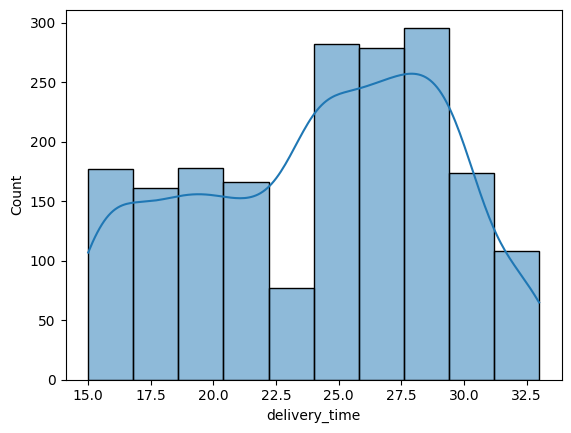

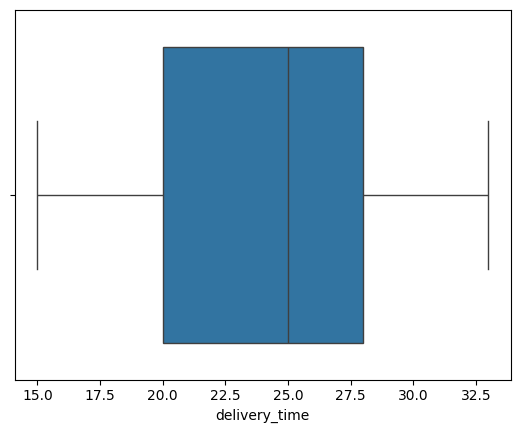

In [24]:
sns.histplot(data=df,x='delivery_time',bins=10,kde=True) # Histogram to show the delivery time Vs count of orders
plt.show()
sns.boxplot(data=df,x='delivery_time') #Boxplot to show the variation , median, quartile and outliers in data
plt.show()

**Observation**



1.   Distribution of the delivery time seems to be slightly left skewed where in most of the orders have been delivered within 28 min.
2.  Mean delivery time of orders is 24 and the median is 25. There is no much of a difference between mean & median.
2.  Most of the orders have been delivered well within a good time or less time.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [25]:
# Find the total count of order ids for every restaurant. Sorting the values in descending order(ascending =False)
df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending=False)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Posto                          1
Philippe Chow                  1
Frank Restaurant               1
Pepe Giallo                    1
wichcraft                      1
Name: order_id, Length: 178, dtype: int64

**Observations:**

**Answer** :

**Top 5 restaurants which has received maximum orders are Shake Shack(219) ,The Meatball Shop(132),Blue Ribbon Sushi(119),Blue Ribbon Fried Chicken(96)  and Parm(68) .**


**Univariate analysis - day_of_the_week**

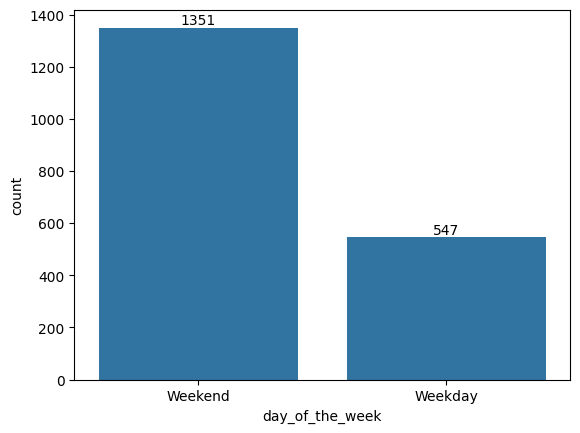

In [33]:
ax = sns.countplot(x='day_of_the_week', data=df) # Countplot to show categorical variable day of the week Vs Count of orders
ax.bar_label(ax.containers[0]); # Count will be displayed on the bars

**Observation**


*   Maximum orders count(1351) were placed during Weekends when compared to Weekdays(547)

**Univariate analysis - rating**

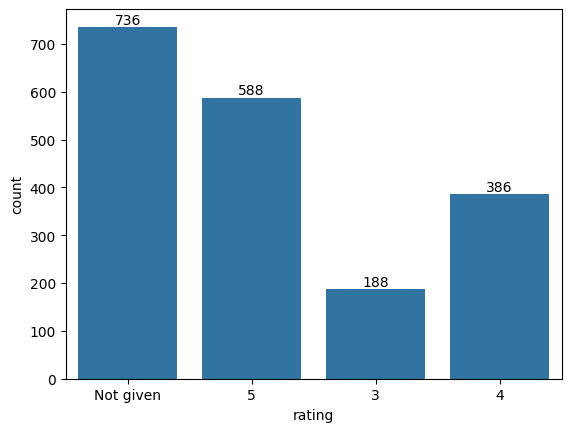

In [35]:
ax = sns.countplot(x='rating', data=df)# Countplot to show categorical variable rating Vs Count of orders
ax.bar_label(ax.containers[0]);# Count will be displayed on the bars

**Observation**

*   About 736 orders have not been given any rating.
*   About 588 orders have been rated as 5.
*   There are 386 orders rated as 4 and 188 orders which have been rated as 3.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

**Answer** : **The most popular cuisine on Weekends is American cuisine type**

See below on the answer derivation

**Univariate Analysis - cuisine type**

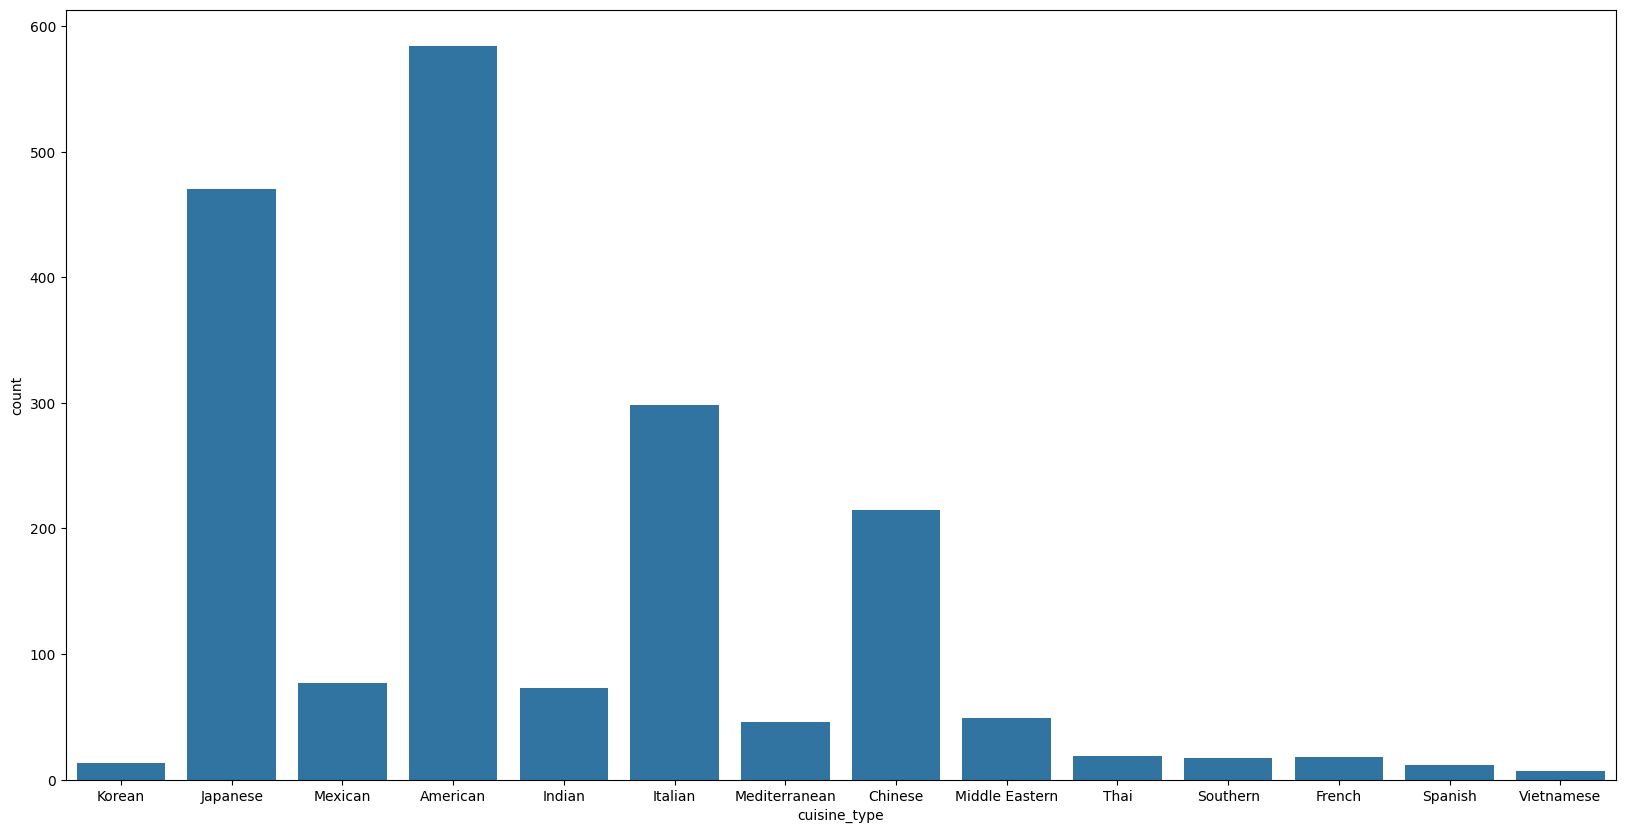

In [26]:
plt.figure(figsize = (20,10)) #Provide co-ordinates for changing the figure size
sns.countplot(df,x='cuisine_type'); #Countplot for categorical variables Vs Count of orders

**Relationship between cuisine type and day of the week**
*Categorical Vs Categorical*

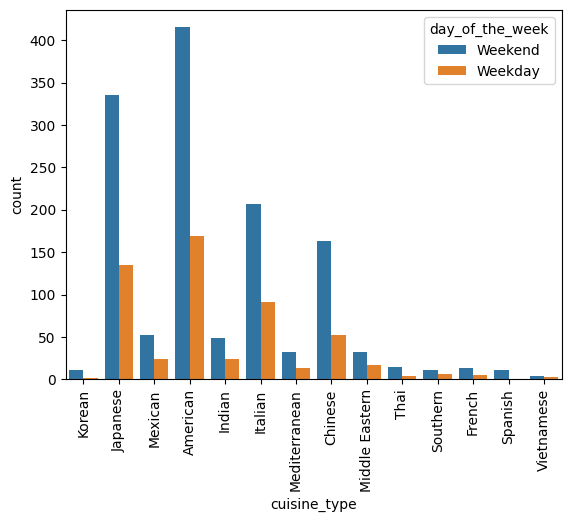

In [29]:
#Check Cuisine type preferences changes with day of the week; Provide hue parameter to return cuisine type Vs count for day of the week parameter.
sns.countplot(df, x='cuisine_type',hue='day_of_the_week');
plt.xticks(rotation=90); #Will rotate the x-axis values in 90 degree

**Observation**

**Answer** : **The most popular cuisine on Weekends is American cuisine type**

*   Maximum orders were placed from restaurants having American cuisine type followed by Japanese, Italian, Chinese, Mexican and Indian during both Weekends and Week days
*  Least number of orders were placed from restaurants having Korean,Thai,Southern,French,Spanish and Vietnamese cuisine types
*   In general, most of the orders are placed over the weekends and there is no difference in the preference of cuisine during a weekday or weekend.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [31]:
#Find percentage of orders costing more than 20 dollars.

# Get the total sum of the orders having cost more than 20 dollars with respect to the total count of records . Get the percentage of these records
percentage_order= ((df['cost_of_the_order']>20.0).sum()[(df['cost_of_the_order']>20.0).sum()>0]/df.shape[0])*100
print(percentage_order)

[29.24130664]


**#### Observations:**

**Answer** : **29.2 percent**

### **Question 10**: What is the mean order delivery time? [1 mark]

In [47]:
df['delivery_time'].mean()

24.161749209694417

**#### Observations:**

**Answer :  The mean order delivery time is 24.16 min**

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [37]:
#The customers who have placed maximum orders.Group by customer id and get total count of order_ids.Sort values descending(ascending=False)
df.groupby(['customer_id'])['order_id'].count().sort_values(ascending=False)

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
          ..
105903     1
105992     1
106006     1
106324     1
405334     1
Name: order_id, Length: 1200, dtype: int64

**#### Observations:**

**Answer** : **There are frequent customers and some of the top three customer ids having placed multiple orders are 52832,47440 and 83287**

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Relationship between cuisine types and ratings**
*Categorical Vs Categorical*

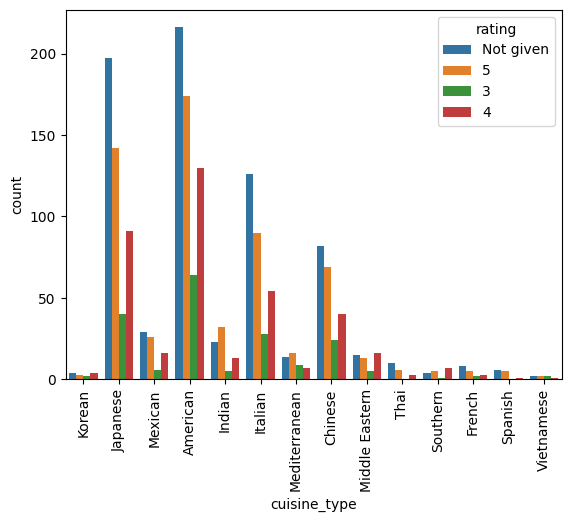

In [38]:
#Cuisine type Vs  rating
sns.countplot(df, x='cuisine_type',hue='rating');
plt.xticks(rotation=90);

**Observation**



*  Most rated orders are from cuisine type American ,Japanese, Italian, Chinese, Mexican and Indian

*   American ,Japanese, Italian, Chinese, Mexican and Indian have been rated 5 the most.These were most preferred cuisine types too.
*   Spanish, Vietnamese and Korean have not been rated well. These were the least preferred cuisine types too.


**Relationship between cuisine types and its cost of order**
*Categorical Vs Numerical*

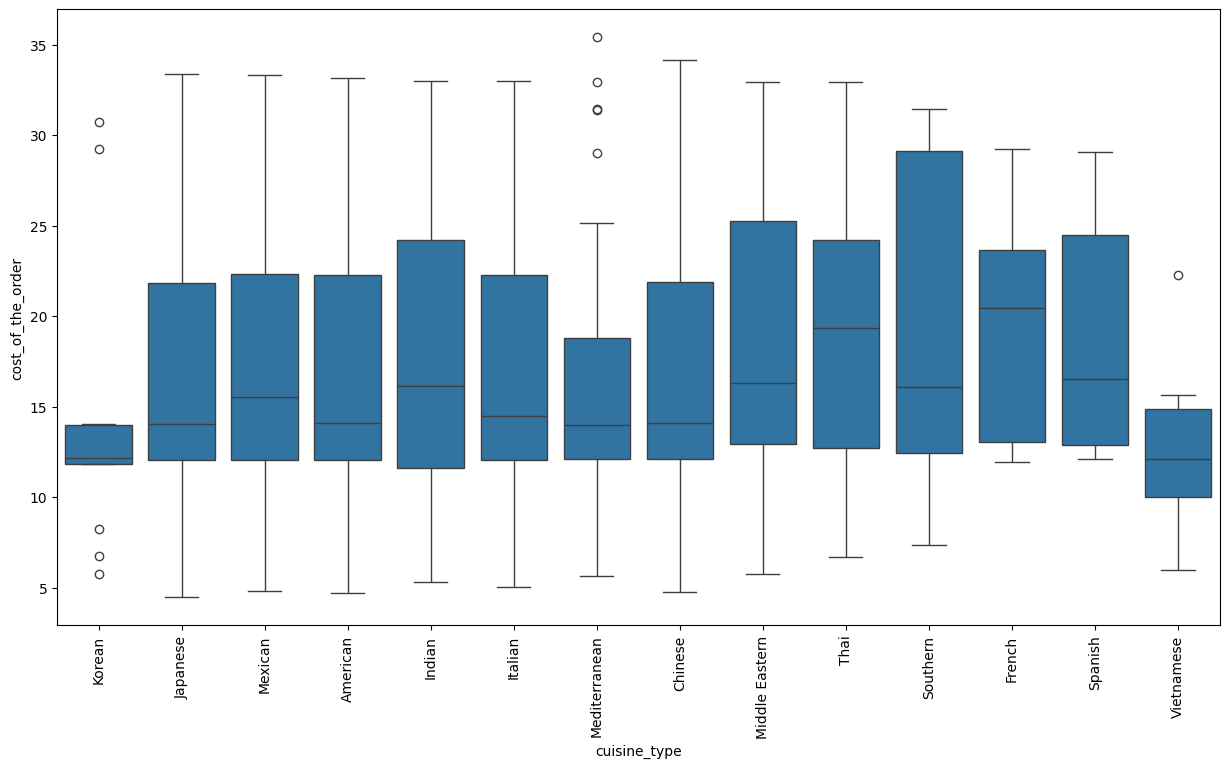

In [39]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order') # Boxplot to show relationship between x = cuisine type  and y= cost of order
plt.xticks(rotation=90); #Displays x-axis values in 90 degree for a visual appeal

**Observation**



*  American, Japanese, Italian and Chinese cuisines have 75% of the orders within range 13 ~ 23 . Most of the orders have been placed from restaurants for these cuisine types as well.

*  French, Spanish and Southern seems to be priced a little higher.The count of orders from these cuisine types are a bit lower based on the countplot .

*   Least number of orders were placed from Korean and Vitenamese inspite of cost being low. This seems to be a less favorite cuisine types.

*   Most of the cuisine types have 75% of the orders having cost below 28.

*   There are outliers for few of the orders on Korean and Meditteranean cuisine types

*   At this point, we cannot say that cuisine types having lower prices have more orders or vice versa.Let's see if the day of the week plays any role

**Relationship between cuisine type, cost, rating and day of the week**
*Categorical Vs Numerical*

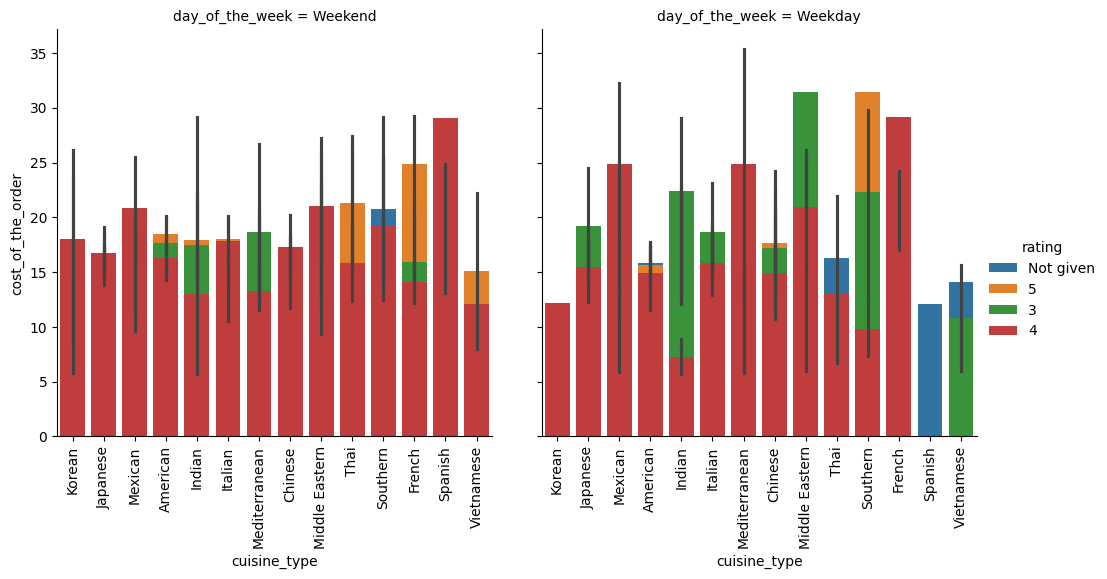

In [40]:
#Catplot with kind= bar to show a bar graph with to show variation of cuisine types and their cost for different days of the week. It also shows rating changes
g=sns.catplot(df,x='cuisine_type',y='cost_of_the_order',hue='rating',col='day_of_the_week',kind='bar',dodge=False);
g.set_xticklabels(rotation=90);

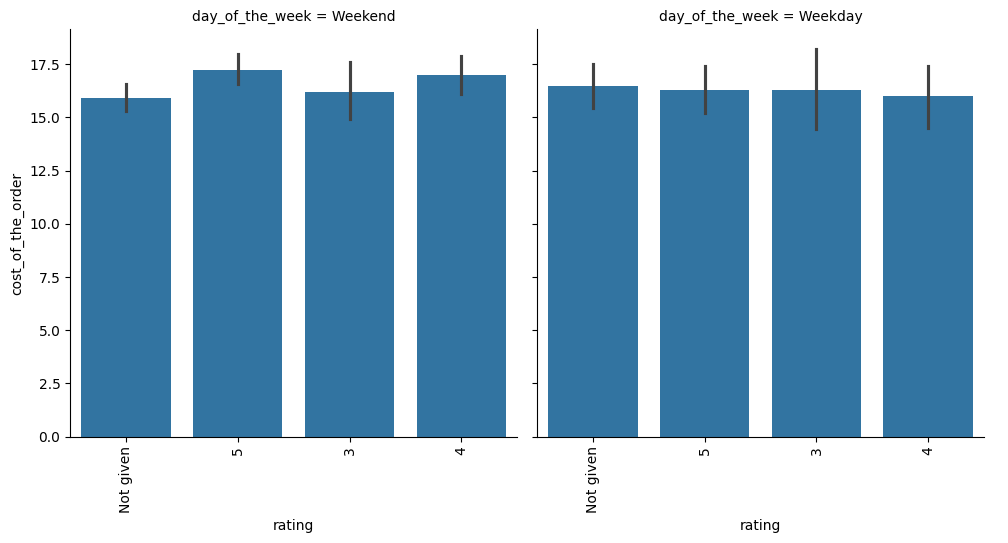

In [74]:
#Catplot with kind= bar to show a bar graph with to show variation of rating with their cost for different days of the week.
g=sns.catplot(df,x='rating',y='cost_of_the_order',col='day_of_the_week',kind='bar',dodge=False);
g.set_xticklabels(rotation=90);

In [41]:
#Get the total restaurant count for each cuisine type
df.groupby(["cuisine_type"])["restaurant_name"].count()

cuisine_type
American          584
Chinese           215
French             18
Indian             73
Italian           298
Japanese          470
Korean             13
Mediterranean      46
Mexican            77
Middle Eastern     49
Southern           17
Spanish            12
Thai               19
Vietnamese          7
Name: restaurant_name, dtype: int64

**Observation**



*   Orders placed during Weekends have been rated as 3,4, 5 and Not Given. Mostly it has been rated as 5 regardless of the cuisine types.
*   There are a few orders in Southern cuisine type wich has not been rated on Weekends.
*   Orders placed during Weekdays have been rated as 3,4, 5 and Not Given.Mostly it has been rated as 4 regardless of the cuisine types.
*   There are a few orders in Vietnamese,Southern, Middle Eastern and Indian which have been rated as 3 during Weekdays.

*   In short , we can say that ratings provided between Weekends and Weekdays show no much of a difference. And there is nothing really impacting the rating.

*   There is a variation in price for different cuisine types between Weekdays and Weekends.Example - Mexican, Indian, Mediterranean, Middle Eastern and Southern  are priced a little higher on Weekdays. This could be a reason  for the number of orders being higher on Weekends than Weekdays for some of the cuisine types.


*   We can also see based on our query results that there are more American, Italian, Japanese , Chinese and Indian restaurants than any other cuisine types. This also explains why there are more orders for these cuisine types when compared to the the others due to more restaurant options being available.

**Relationship between rating and food prep time and day of the week**
*Categorical Vs Numerical*

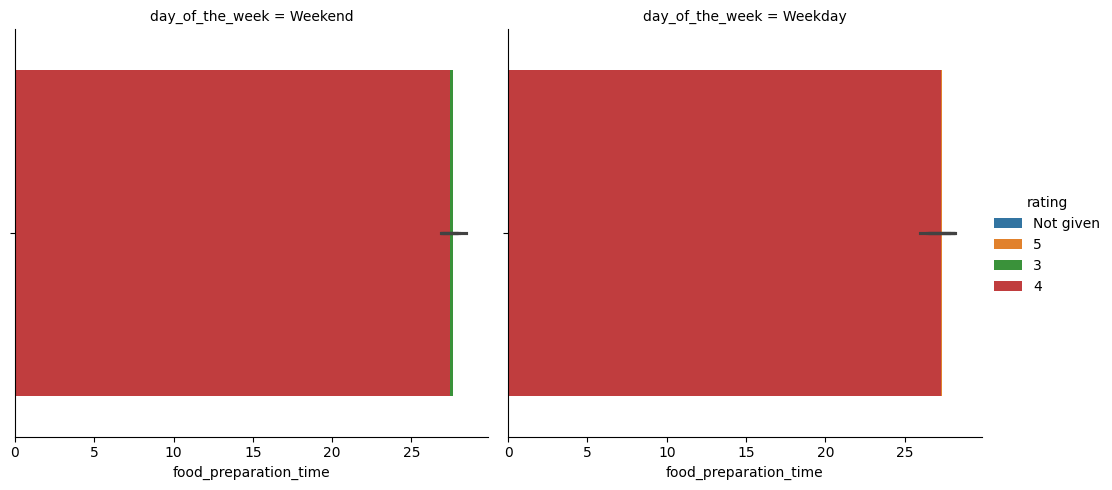

In [42]:
#Catplot to show bar graph of food prep time over the weekend/weekday and its effect on ratings
g=sns.catplot(df,x='food_preparation_time',hue='rating',col='day_of_the_week',kind='bar',dodge=False);

**Observation**



*   Time to prepare food does not have much of a variance between  Weekends and Weekdays
*   Most of the orders have been rated 4. Food preparation time doesnt seem to affect rating as well.




**Relationship between rating and delivery time and day of the week**
*Categorical Vs Numerical*

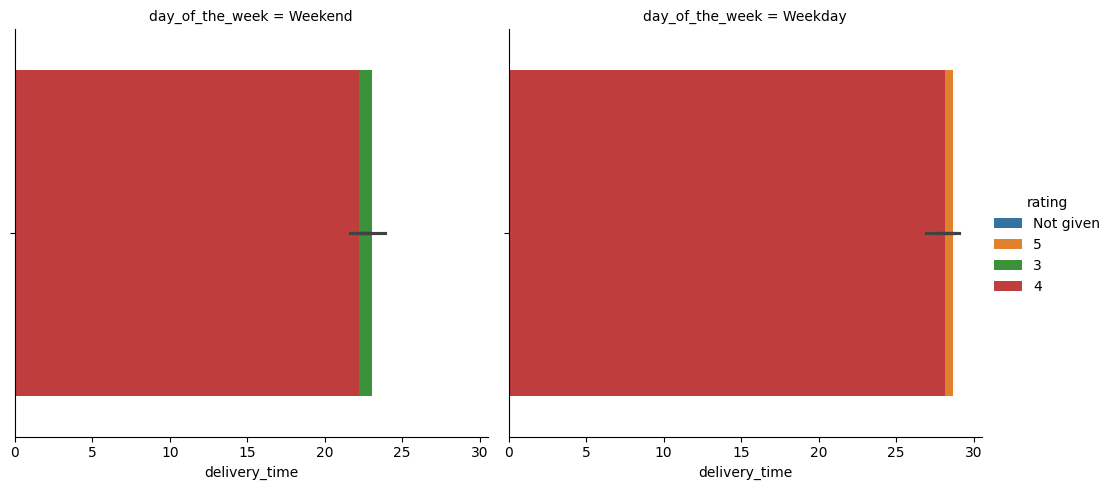

In [43]:
#Catplot to show a bar graph(kind= bar) to show variation in delivery time for different days of the week and its effect on ratings
g=sns.catplot(df,x='delivery_time',hue='rating',col='day_of_the_week',kind='bar',dodge=False);

**Observation**
Delivery time is comparatively less during Weekends when compared to Weekdays.This could be probably due to a busy traffic during Weekdays when compared to Weekends.

**Relationship between numerical values**

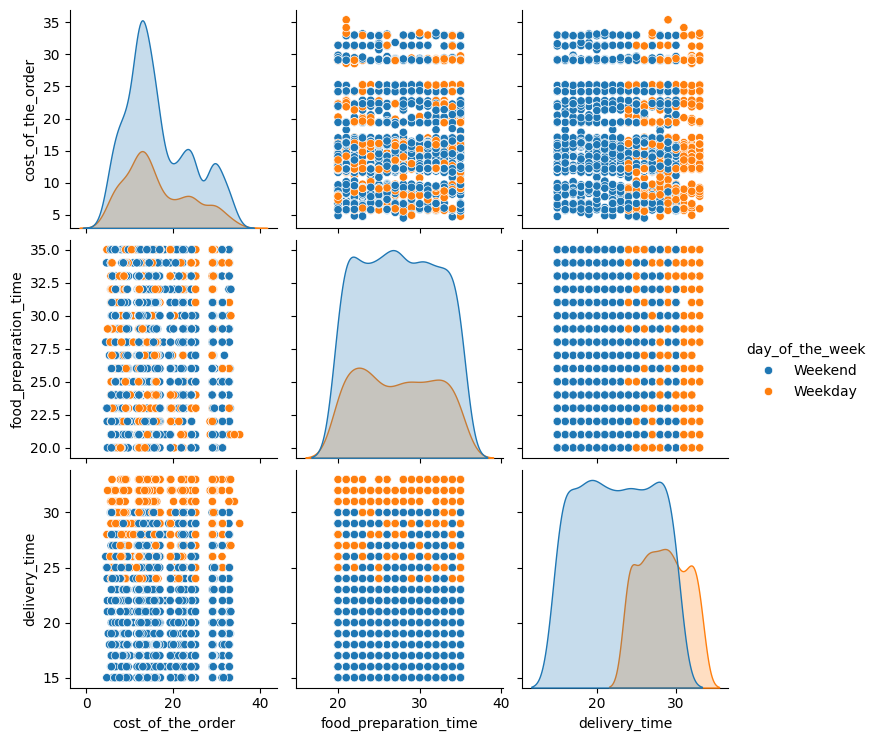

In [44]:
# Pairplot to shows the relationship between every numerical column provided in the vars list for different days of the week (depicted in different colors)
sns.pairplot(data=df,vars= ['cost_of_the_order','food_preparation_time','delivery_time'],hue='day_of_the_week');

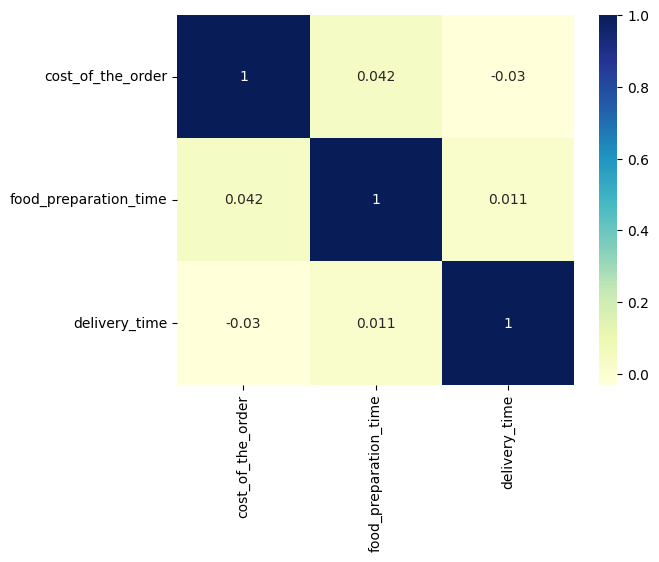

In [45]:
#Heatmap shows the correlation between numericak columns
sns.heatmap(data=df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(),annot=True, cmap='YlGnBu');

**Observation**



*   Cost of the order during Weekday and Weekend seems to be almost the same. It does not show a variation.
*   Food preparation time is between Weekends and Weekdays does not show any variation as well. Food prepartion time taken is almost the same.

*  Cost of the order does not seem to change based on the food preparation time or delivery time.There does not seem to be a correlation between cost of order and food prep time during Weekend or Weekday.

*  There does not seem to be a correlation between food prep time and delivery time as well during Weekend or Weekday.It is only 1.1%


*   Delivery times seems to be higher on the Weekdays when compared to Weekends.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [50]:
#Get all records which have been rated as 3,4,5. 'Not Given' is excluded
df_rated = df.loc[df['rating']!='Not given'] #Contains rated records

#For every restaurant, get the total rated counts
df_rated_counts = df_rated.groupby(['restaurant_name'])['rating'].count().reset_index(name="count") #Contains restaurants and count of ratings

#For every restaurant, get the mean
df_rated_mean = df_rated.groupby(['restaurant_name'])['rating'].mean().reset_index(name="mean") #Contains restaurants with their mean ratings

#Get records where rated counts are greater than 50
df_rated_counts = df_rated_counts[df_rated_counts['count']>50]#Contains restaurants with count of ratings greater than 50

#Get records where mean is greater than 4
df_rated_mean= df_rated_mean[df_rated_mean['mean']>4]#Contains restaurants with mean greater than 4

#Get the restaurants by joining two dataframe to get restauarants having rated count greater than 50 and average rating is greater than 4
pd.merge(df_rated_counts,df_rated_mean,how="inner",on="restaurant_name")

,restaurant_name,count,mean
0,Blue Ribbon Fried Chicken,64,5.552274e+61
1,Blue Ribbon Sushi,73,6.089773e+70
2,Shake Shack,133,4.177018e+130
3,The Meatball Shop,84,6.494697e+81


**#### Observations:**

**Answer: Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken** are the restaurants with rated count greater than 50 and Avg rating greater than 4

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [51]:
cost= df['cost_of_the_order'] # create a list of cost of orders from the entire data set

#Method to calculate net cost
def calculateNet(cost):
  net=0.0 #Declare a variable to hold the total net
  for s in range(0,len(cost)):  #Loop through all costs
    if(cost[s]>20):
      net= net + (0.25*cost[s])  #Add 25 % on costs greater than 20 dollars
    elif(cost[s]>5):
       net=net + (0.15*cost[s]) #Add 15 % on costs greater than 20 dollars
    else:
        net =net                #No change in net for any other costs
  print (net)

calculateNet(cost) #Method call to calculate the net

6166.302999999994


**#### Observations:**

**Answer : 6166.302 dollars**


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [52]:
#Lets add a new column Total Time
df['Total_Time'] =df['food_preparation_time']+df['delivery_time']

#Get the sum of time of orders whose total time is more than 60 min. Get the percentage of the those orders by diving with total rows df.shape[0].
# Multiply by 100 to get percent
order_percent= ((df['Total_Time']>60.0).sum()[(df['Total_Time']>60.0).sum()>0]/df.shape[0])*100
print(order_percent)

[10.5374078]


**#### Observations:**

**Answer: 10.5 percent**


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [53]:
#Lets find the mean delivery time during Weekdays and Weekends by grouping by day of week

df.groupby(['day_of_the_week'])['delivery_time'].mean()

#delivery time is more during Weekdays when compared to Weekends.
#Mean delivery time during Weekday = 28.34
#Mean delivery time during  Weekend = 22.47

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

**#### Observations:**

**Answer:**

Mean delivery time during Weekday = 28.34 .
Mean delivery time during  Weekend = 22.47


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Majority of the customers have placed a single order.There are only a few frequent customers utilizing the online portal of FoodHub for orders.

*   The most preferred cuisine types are  American followed by Japanese, Italian, Chinese, Mexican and Indian during both Weekends & Weekdays.

*   The least preferred cuisine types are Korean,Thai,Southern,French,Spanish and Vietnamese cuisine types.

*   There are only few restaurants which has received maximum orders of more than 100.

*   There are more American, Italian, Japanese , Chinese and Indian restaurants than any other cuisine types

*   Most of the orders were placed during Weekends.

*   Delivery time is comparatively less during Weekends when compared to Weekdays









### Recommendations:

Assuming this is only a weeks data which does not provide much details on the month/time of the year when the orders were placed , following would be the recommendations -

1. Customers have a preferred cuisine types and it appears that there are lot of restaurant options in these preferred cuisine types. It will be good to introduce more restaurant options on cuisine types like  Korean , Thai, Vietnamese etc inorder to target more customers who prefer more choices.

2. Timely customer feedback on delivery/quality of food will be good data. For example, certain restaurants have very few orders when compared to the rest. Customer feedback will help improve quality of service and restaurants can be notified as well. Providing customer with coupon codes/ credits would be good to keep customers using the portal.

3. Since most of the orders were placed on Weekends, it is good to add more delivery agents to speed up the delivery so as to create happy customers.


---